In [3]:
!pip install pandas-datareader


   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ------- ------------------------------- 20.5/109.5 kB 330.3 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/109.5 kB 393.8 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/109.5 kB 658.3 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 636.0 kB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [5]:
!pip install yfinance --upgrade

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----- -------------------------------- 143.4/948.2 kB 2.8 MB/s eta 0:00:01
     --------------- ---------------------- 389.1/948.2 kB 4.0 MB/s eta 0:00:01
     ------------------------- ------------ 634.9/948.2 kB 4.4 MB/s eta 0:00:01
     -------------------------------------  942.1/948.2 kB 5.4 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/102.2 kB ? eta -:--:--
   ---------------------------------------- 102.2/102.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.

In [6]:
from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

df = yf.download("GOOGL", start="2009-01-01", end="2024-12-5")
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2024-11-27,169.036270,169.229996,169.479996,168.020004,169.000000,19266500
2024-11-29,168.756592,168.949997,169.429993,167.160004,168.500000,14257200
2024-12-02,171.293686,171.490005,172.080002,168.570007,168.770004,23789100
2024-12-03,171.143845,171.339996,172.679993,170.850006,171.490005,22248700
2024-12-04,174.170380,174.369995,174.910004,171.059998,171.149994,31615100


In [7]:
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

C:\Users\Shivani\AppData\Local\Temp\ipykernel_28100\2389901103.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,8.041041,8.053554,7.645145,7.722723,144275580
1,8.209459,8.289289,7.882883,8.033033,195364440
2,8.359860,8.528529,8.167918,8.332833,256750992
3,8.058308,8.281031,7.976727,8.216216,179600220
4,8.137888,8.137888,7.941441,7.964965,143883972


In [8]:
df.shape

(4008, 5)

In [9]:
# Moving Average for 100
ma100 = df.Close.rolling(100).mean()

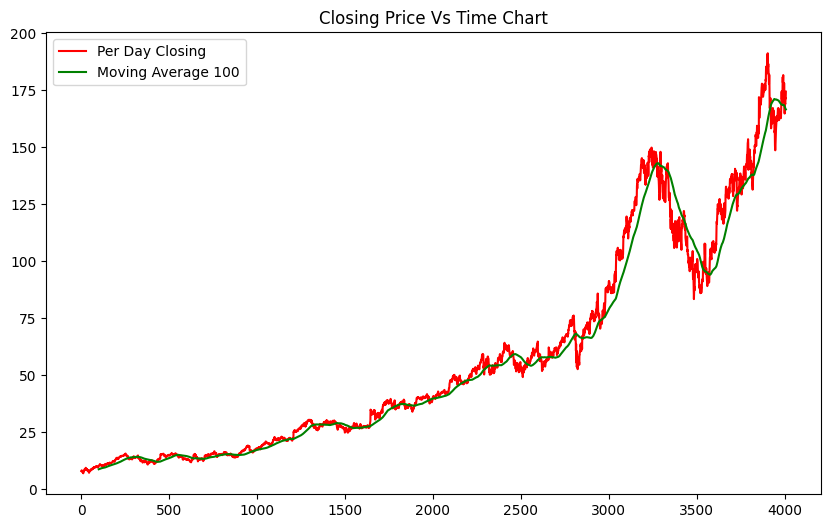

In [10]:
plt.figure(figsize = (10, 6))
plt.title("Closing Price Vs Time Chart")
plt.plot(df.Close, 'r', label="Per Day Closing")
plt.plot(ma100, 'g', label="Moving Average 100")
plt.legend()

In [12]:
# Moving Average for 200
ma200 = df.Close.rolling(200).mean()

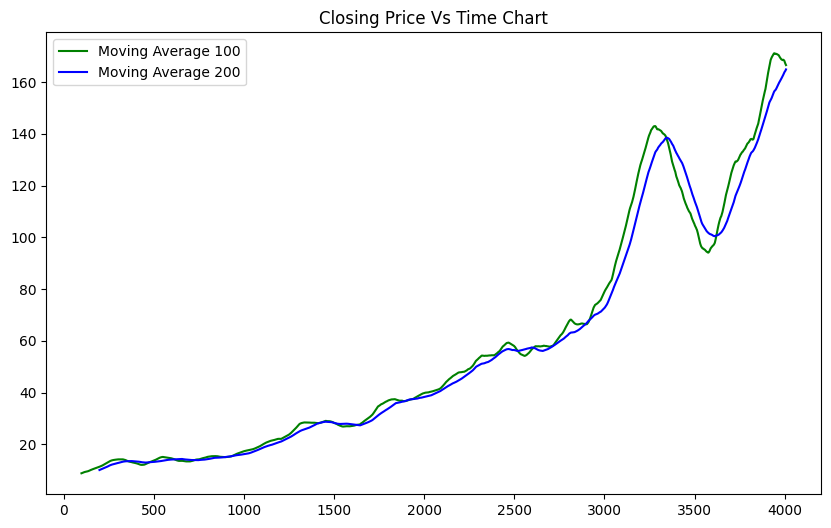

In [13]:
plt.figure(figsize = (10, 6))
plt.title("Closing Price Vs Time Chart")
plt.plot(ma100, 'g', label="Moving Average 100")
plt.plot(ma200, 'b', label="Moving Average 200")
plt.legend()

In [14]:
train_df = pd.DataFrame(df['Close'][0: int(len(df)*0.80)])
test_df = pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])
print(train_df.shape)
print(test_df.shape)

(3206, 1)
(802, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
train_df_arr = scaler.fit_transform(train_df)
train_df_arr

array([[0.00698724],
       [0.00820643],
       [0.00929519],
       ...,
       [0.97104745],
       [0.9782792 ],
       [0.97000504]])

In [17]:
x_train = []
y_train = []
for i in range(100, train_df_arr.shape[0]):
    x_train.append(train_df_arr[i-100: i])
    y_train.append(train_df_arr[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((3106, 100, 1), (3106,))

In [18]:
# 1. Dropout is a regularization technique where randomly selected neurons are ignored during training.
# In order to prevent Neural Network from overfitting
# 2. LSTM, which stands for long short-term memory network, is a special kind of RNN that can perform
# learning from long-term dependencies, which is a problem when using simple RNN.
# 3. A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.
# 4. A dense layer is a fully connected layer used in the neural network's end stages
# to change the output's dimensionality from the preceding layer.
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\Shivani\menv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - loss: 0.0297
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - loss: 0.0035
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - loss: 0.0036
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - loss: 0.0055
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - loss: 0.0026
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - loss: 0.0023
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - loss: 0.0026
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - loss: 0.0021
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - loss: 0.0033
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - loss: 0.0021
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - loss: 0.0018
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - loss: 0.0025
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - loss: 0.0019
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - loss: 0.0019
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [ ]:
model.save('keras_model.h5')

In [ ]:
past_100_days = train_df.tail(100)

In [ ]:
final_df = past_100_days._append(test_df, ignore_index=True)
final_df.head()

Ticker,GOOGL
0,116.867500
1,117.596497
2,114.587502
3,113.502998
4,110.012497


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.31032485],
       [0.31709048],
       [0.28916476],
       [0.27909977],
       [0.24670532],
       [0.26006501],
       [0.28296056],
       [0.28785152],
       [0.27557772],
       [0.27976797],
       [0.29621815],
       [0.29026913],
       [0.3213179 ],
       [0.32216709],
       [0.33025991],
       [0.32207893],
       [0.31937356],
       [0.33066358],
       [0.32574947],
       [0.31507192],
       [0.33641299],
       [0.34046404],
       [0.33867285],
       [0.34308126],
       [0.3556984 ],
       [0.35341071],
       [0.36209286],
       [0.35257081],
       [0.34656614],
       [0.35557775],
       [0.34042694],
       [0.35621812],
       [0.36102552],
       [0.3591369 ],
       [0.36259863],
       [0.36267751],
       [0.36293277],
       [0.36048725],
       [0.35878889],
       [0.36208358],
       [0.38819028],
       [0.3968446 ],
       [0.39948029],
       [0.38620883],
       [0.39061257],
       [0.40413462],
       [0.40753134],
       [0.415

In [ ]:
input_data.shape

(902, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((802, 100, 1), (802,))

In [ ]:
y_pred = model.predict(x_test)
y_pred.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


(802, 1)

In [ ]:
y_pred

array([[0.5181604 ],
       [0.51599866],
       [0.5131417 ],
       [0.5093012 ],
       [0.504748  ],
       [0.49960738],
       [0.4942832 ],
       [0.48931175],
       [0.48523462],
       [0.48240495],
       [0.4808399 ],
       [0.48014003],
       [0.47999585],
       [0.480506  ],
       [0.48176944],
       [0.48389322],
       [0.48688984],
       [0.4905154 ],
       [0.49444407],
       [0.4979372 ],
       [0.5004562 ],
       [0.50195754],
       [0.503212  ],
       [0.5048725 ],
       [0.5074476 ],
       [0.5107409 ],
       [0.5145639 ],
       [0.5188182 ],
       [0.5235415 ],
       [0.5287397 ],
       [0.5343195 ],
       [0.54008085],
       [0.5454553 ],
       [0.55000204],
       [0.55380887],
       [0.55703217],
       [0.5597497 ],
       [0.5620377 ],
       [0.56414896],
       [0.56616306],
       [0.5678165 ],
       [0.568861  ],
       [0.56922925],
       [0.56857353],
       [0.567093  ],
       [0.5647306 ],
       [0.5614486 ],
       [0.557

In [ ]:
y_test

array([0.48631095, 0.47260792, 0.46632017, 0.4929281 , 0.46616708,
       0.48810207, 0.50241305, 0.51781912, 0.52302098, 0.51493276,
       0.49205576, 0.50257081, 0.53569378, 0.53770766, 0.55079354,
       0.5550534 , 0.54142924, 0.54251513, 0.50242693, 0.50131796,
       0.51859402, 0.58271464, 0.57929469, 0.59968454, 0.55746634,
       0.57542923, 0.58624605, 0.6017402 , 0.60716482, 0.60882608,
       0.60778197, 0.57970764, 0.57852899, 0.60554987, 0.60345244,
       0.59810683, 0.59969375, 0.61632024, 0.60785617, 0.5834989 ,
       0.57867287, 0.58180974, 0.54527149, 0.57633881, 0.54262191,
       0.53477032, 0.55253835, 0.543587  , 0.55429237, 0.592478  ,
       0.60098837, 0.59590263, 0.59927146, 0.57908596, 0.56127148,
       0.58478885, 0.56626461, 0.54102097, 0.53992574, 0.55723905,
       0.58454754, 0.58920193, 0.59838978, 0.58707193, 0.58677497,
       0.58255689, 0.57004185, 0.57133647, 0.56584232, 0.50436193,
       0.50410674, 0.49732716, 0.51266356, 0.52256145, 0.53828

In [ ]:
scale = scaler.scale_
scale_factor = 1/scale
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

In [ ]:
y_pred

array([[55.83177945],
       [55.59885184],
       [55.29101336],
       [54.87719886],
       [54.38659173],
       [53.83269184],
       [53.25901095],
       [52.72333784],
       [52.28402641],
       [51.97912939],
       [51.81049643],
       [51.73508461],
       [51.71954883],
       [51.77451815],
       [51.91065376],
       [52.1394903 ],
       [52.46237646],
       [52.85303178],
       [53.27634501],
       [53.65272977],
       [53.92415324],
       [54.08592065],
       [54.22108648],
       [54.40000812],
       [54.67747507],
       [55.03232551],
       [55.44425825],
       [55.90265705],
       [56.41159372],
       [56.97169765],
       [57.5729242 ],
       [58.19370697],
       [58.77280193],
       [59.26271545],
       [59.67290129],
       [60.02021184],
       [60.31302833],
       [60.55955857],
       [60.78704641],
       [61.00406572],
       [61.1822231 ],
       [61.29476924],
       [61.33444683],
       [61.263794  ],
       [61.10426801],
       [60

In [ ]:
y_test

array([ 52.40000153,  50.92350006,  50.24599457,  53.11299896,
        50.22949982,  52.59299469,  54.13500214,  55.7950058 ,
        56.3555069 ,  55.48400116,  53.01900482,  54.15200043,
        57.72100067,  57.93799591,  59.34799957,  59.80699921,
        58.33899689,  58.45600128,  54.1364975 ,  54.01700592,
        55.87850189,  62.78749847,  62.41899872,  64.61600494,
        60.06699371,  62.00249481,  63.1680069 ,  64.83750153,
        65.4220047 ,  65.60100555,  65.4885025 ,  62.46349335,
        62.33649445,  65.24799347,  65.02199554,  64.44600677,
        64.61699677,  66.40850067,  65.49649811,  62.87200165,
        62.35199738,  62.68999481,  58.75299835,  62.10050201,
        58.46750641,  57.62149811,  59.53600311,  58.57149506,
        59.72499847,  63.83950043,  64.75649261,  64.20850372,
        64.57149506,  62.39650726,  60.47699738,  63.01099396,
        61.01500702,  58.2950058 ,  58.17699432,  60.04250336,
        62.98499298,  63.4865036 ,  64.47649384,  63.25

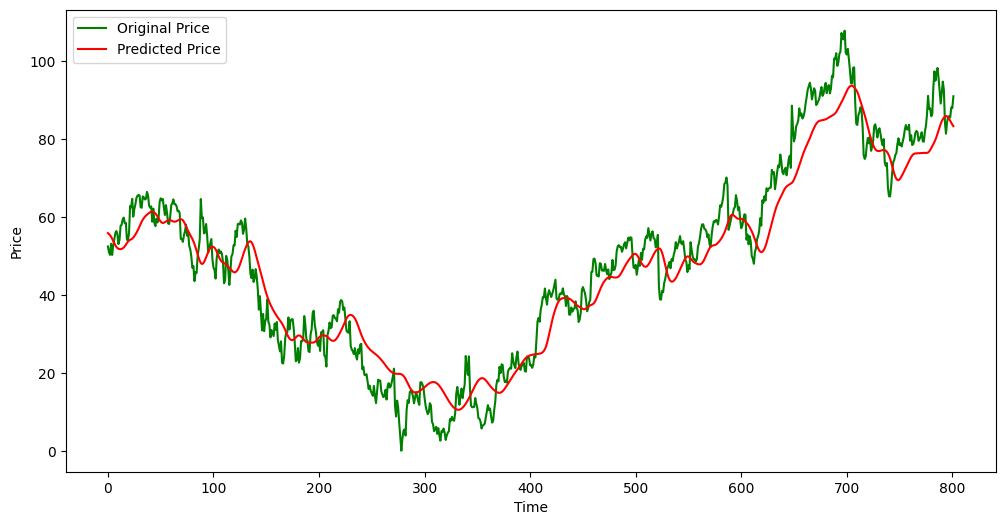

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'g', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()